# Data Analytics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# imports data locally
df = pd.read_csv('neo_v2.csv')

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
df.shape

(90836, 10)

In [ ]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

**How many NEOs(Near Earth Objects) are and aren't hazardous?**

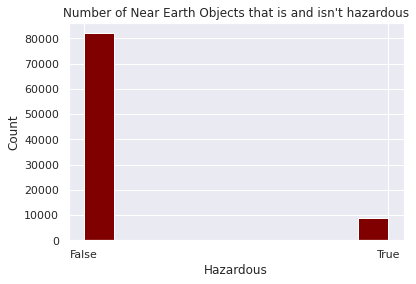

In [ ]:
sns.set()

hazardous = df['hazardous'].copy()

plt.hist(hazardous.astype(str), color='maroon')

plt.xlabel('Hazardous')
plt.ylabel('Count')

plt.title('Number of Near Earth Objects that is and isn\'t hazardous')

plt.savefig('hazardous_histogram',dpi=200, bbox_inches='tight')

plt.show()

Most of NEOs are not hazardous (however there are still a lot of hazardous ones) 

**Relative Velocity of NEOs**

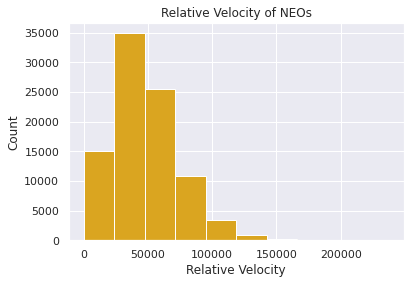

In [ ]:
sns.set()

plt.hist(df['relative_velocity'], color='goldenrod')

plt.xlabel('Relative Velocity')
plt.ylabel('Count')

plt.title('Relative Velocity of NEOs')

plt.savefig('relative_vel_histogram',dpi=200, bbox_inches='tight')

plt.show()

Slightly positively skewed distribution of relative velocity of NEOs

Absolute Magnitude

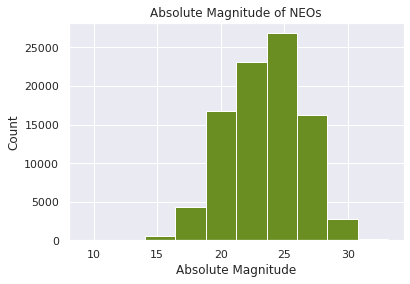

In [ ]:
sns.set()

plt.hist(df['absolute_magnitude'], color='olivedrab')

plt.xlabel('Absolute Magnitude')
plt.ylabel('Count')

plt.title('Absolute Magnitude of NEOs')

plt.savefig('absolute_magnitude_histogram',dpi=200, bbox_inches='tight')

plt.show()

Quite symmetrical

**Absolute Magnitude and Diameter of NEOs**

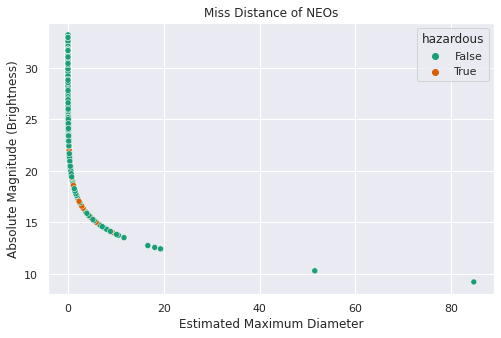

In [ ]:
sns.set()
plt.figure(figsize=(8,5))

sns.scatterplot(x='est_diameter_max', y='absolute_magnitude', data=df, hue='hazardous', palette='Dark2')

plt.xlabel('Estimated Maximum Diameter')
plt.ylabel('Absolute Magnitude (Brightness)')

plt.title('Miss Distance of NEOs')

plt.savefig('absmag_diameter_scatterplot',dpi=200, bbox_inches='tight')

Overall negative correlation however relationship is not linear

**Miss Distance of NEOs**

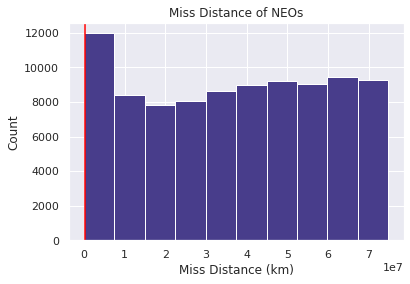

In [ ]:
sns.set()

plt.hist(df['miss_distance'], color='darkslateblue')
plt.axvline(384400, color='red')

plt.xlabel('Miss Distance (km)')
plt.ylabel('Count')

plt.title('Miss Distance of NEOs')

plt.savefig('miss_distance_histogram',dpi=200, bbox_inches='tight')

plt.show()

A uniform distribution of miss distances of NEOs

**Estimated Minimum and Maximum Diameter**



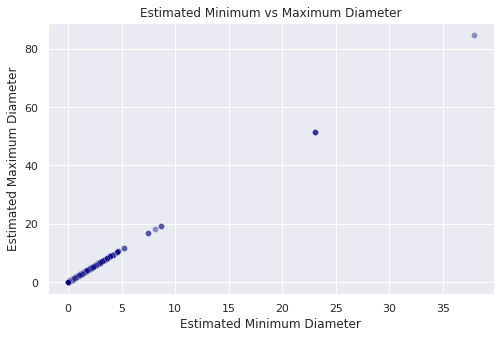

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='est_diameter_min', y='est_diameter_max', data=df, alpha=0.4, color='navy')

plt.xlabel('Estimated Minimum Diameter')
plt.ylabel('Estimated Maximum Diameter')

plt.title('Estimated Minimum vs Maximum Diameter')

plt.savefig('diameter_scatterplot',dpi=200, bbox_inches='tight')

Estimated minimum and maximum diameter are perfectly correlated

**Correlation between variables**

In [ ]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


Correlation between columns in this dataset are generally low

# Machine Learning

In [ ]:
X = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09


In [ ]:
y = df[['hazardous']]
y.head()

,hazardous
0,False
1,True
2,False
3,False
4,True


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.1444018992814463

Linear Regression gives a very bad score because this data requires a classifier, not a regressor

In [ ]:
index = [4,6,8,10,12]
model.predict(X.iloc[index])

array([[0.20845351],
       [0.18048042],
       [0.22202478],
       [0.23361777],
       [0.09592213]])

Prediction came out weird as it is in a range, not as a 1 or 0

In [ ]:
y.iloc[index]

,hazardous
4,True
6,False
8,False
10,True
12,False


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X,y.values.ravel())

LogisticRegression()

In [ ]:
model.score(X,y)

0.90268175613193

A very good score however, there is a problem which will appear later

In [ ]:
model.predict(X.iloc[index])

array([False, False, False, False, False])

In [ ]:
y.iloc[index]

,hazardous
4,True
6,False
8,False
10,True
12,False


In [ ]:
model.predict_proba(X.iloc[index])

array([[0.88805269, 0.11194731],
       [0.78789034, 0.21210966],
       [0.95127025, 0.04872975],
       [0.8906094 , 0.1093906 ],
       [0.89699327, 0.10300673]])

In [ ]:
pd.Series(data=model.predict(X)).value_counts()

False    90836
dtype: int64

When running predictions on every row prediction is always False which may be caused by an imbalanced sample

## K Nearest Neighbors

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fits model using regular training data
def fit_model(model):
  model.fit(X_train, y_train.values.ravel())
  return model

From now on when scoring a model this function will be used for convenience.<br>The data used will also be split into training and testing sets however, the unbalanced data set problem has yet to be addressed

In [ ]:
# puts the model through different scoring metrics
def score_model(model):
  y_pred = model.predict(X_test)
  print(f'accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'f1: {f1_score(y_test, y_pred)}')
  print(f'roc_auc: {roc_auc_score(y_test, y_pred)}')
  print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
m = fit_model(KNeighborsClassifier())
score_model(m)

accuracy: 0.8961204808666168
f1: 0.059034702832070206
roc_auc: 0.5108919311743978
[[20276   248]
 [ 2111    74]]


In [ ]:
m = fit_model(KNeighborsClassifier(n_neighbors=10))
score_model(m)

accuracy: 0.903342287198908
f1: 0.0018190086402910413
roc_auc: 0.5001653252295577
[[20512    12]
 [ 2183     2]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
m = fit_model(DecisionTreeClassifier())
score_model(m)

accuracy: 0.8958562684398256
f1: 0.4621332726859222
roc_auc: 0.7033576586343967
[[19328  1196]
 [ 1169  1016]]


In [ ]:
m = fit_model(DecisionTreeClassifier(max_depth=100))
score_model(m)

accuracy: 0.895019595754987
f1: 0.4567000911577028
roc_auc: 0.7000321886928603
[[19323  1201]
 [ 1183  1002]]


In [ ]:
m = fit_model(DecisionTreeClassifier(max_depth=50))
score_model(m)

accuracy: 0.8962525870800123
f1: 0.4588883785025264
roc_auc: 0.7001009032457174
[[19354  1170]
 [ 1186   999]]


In [ ]:
m = fit_model(DecisionTreeClassifier(max_depth=30))
score_model(m)

accuracy: 0.9014487648069047
f1: 0.44466501240694783
roc_auc: 0.681915049947664
[[19575   949]
 [ 1289   896]]


In [ ]:
m = fit_model(DecisionTreeClassifier(max_depth=5))
score_model(m)

accuracy: 0.9138667488660883
f1: 0.22133757961783437
roc_auc: 0.5624218362205412
[[20475    49]
 [ 1907   278]]


In [ ]:
m = fit_model(DecisionTreeClassifier(max_depth=2))
score_model(m)

accuracy: 0.9139107842705535
f1: 0.22266401590457258
roc_auc: 0.5628551404015705
[[20474    50]
 [ 1905   280]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m = fit_model(RandomForestClassifier())
score_model(m)

accuracy: 0.9193271390197719
f1: 0.5019032082653616
roc_auc: 0.6973266326145158
[[19954   570]
 [ 1262   923]]


In [ ]:
m = fit_model(RandomForestClassifier(n_estimators=200))
score_model(m)

accuracy: 0.9187546787617245
f1: 0.49795918367346936
roc_auc: 0.6953741603846498
[[19949   575]
 [ 1270   915]]


In [ ]:
m = fit_model(RandomForestClassifier(n_estimators=50))
score_model(m)

accuracy: 0.9184023955260029
f1: 0.4907941742236878
roc_auc: 0.6906808995619127
[[19963   561]
 [ 1292   893]]


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
m = fit_model(XGBClassifier())
score_model(m)

accuracy: 0.9150116693821833
f1: 0.24961119751166408
roc_auc: 0.571847503865542
[[20458    66]
 [ 1864   321]]


## Comparing Models

In [ ]:
models = {
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'xgb': XGBClassifier()
}

def compare(models, score):
  data = []
  for i, m in models.items():
    m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test)
    
    data.append([float(score(y_test, y_pred)),i])

  return pd.DataFrame(data=data, columns=['score','model'])

In [ ]:
def bar_graph_comparison(data, palette='tab20b', title=None, savefig=None):
  sns.set()

  sns.barplot(x='model', y='score', data=data, palette=palette)

  plt.xlabel('model')
  plt.ylabel(f'score')

  if title:
    plt.title(title)
  else:
    plt.title('Model Comparison')

  if savefig:
    plt.savefig(savefig,dpi=200, bbox_inches='tight')
  

  plt.show()

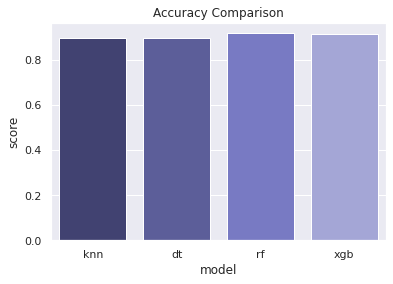

In [ ]:
bar_graph_comparison(compare(models, accuracy_score), title='Accuracy Comparison', savefig='accuracy_bar')

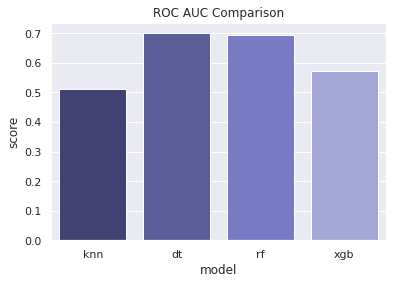

In [ ]:
bar_graph_comparison(compare(models, roc_auc_score), title='ROC AUC Comparison', savefig='roc_auc_bar')

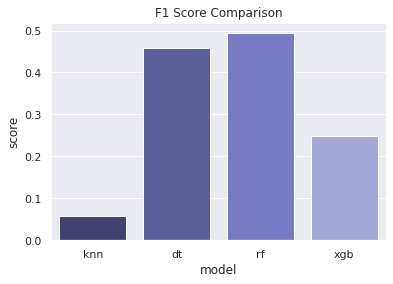

In [ ]:
bar_graph_comparison(compare(models, f1_score), title='F1 Score Comparison', savefig='f1_score_bar')

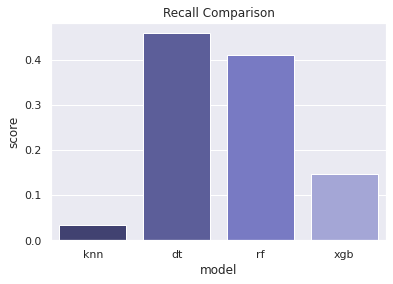

In [ ]:
bar_graph_comparison(compare(models, recall_score), title='Recall Comparison', savefig='recall_bar')

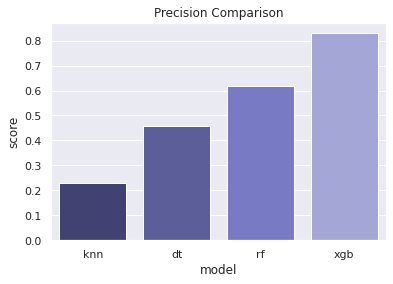

In [ ]:
bar_graph_comparison(compare(models, precision_score), title='Precision Comparison', savefig='precision_bar')

## Improving Model



### Tuning Hyperparameters

We will try to use different methods to find the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "n_estimators": [30, 50, 80, 100],
    "max_features": ['sqrt', 'log2', None]
}

clf = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc')
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [30, 50, 80, 100]},
             scoring='roc_auc')

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'max_features': 'log2', 'n_estimators': 100}
0.9297857219281053


### Imbalanced Datasets

Here we will try to address the problem of an imbalanced dataset

In [ ]:
model = RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators=100)
model.fit(X_train, y_train.values.ravel())
score_model(model)

accuracy: 0.919811528468889
f1: 0.4909141738887336
roc_auc: 0.6883934062572054
[[20010   514]
 [ 1307   878]]


In this case a 'false negative' would be worse than a 'false positive because we would rather find a non hazardous NEO than not find a hazardous NEO therefore, we would be looking to reduce the number of 'false negatives' as much as possible while keeping the overall accuracy as high as possible

Also, Confusion Matrix can also be used to compare the false negatives and false positives

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [ ]:
oversampler = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = oversampler.fit_resample(X_train, y_train)

In [ ]:
model = RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators=100)
model.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

RandomForestClassifier(class_weight='balanced', max_features='sqrt')

In [ ]:
score_model(model)

accuracy: 0.9140869258884143
f1: 0.5495266682059571
roc_auc: 0.7490214057594904
[[19568   956]
 [  995  1190]]


Oversampling using SMOTE provides great improvement as eventhough the accuracy is slightly lower, the results are more balanced

In [ ]:
undersampler = TomekLinks(sampling_strategy='auto')
X_train_Tomek, y_train_Tomek = undersampler.fit_resample(X_train, y_train)

In [ ]:
model = RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators=100)
model.fit(X_train_Tomek, y_train_Tomek.values.ravel())

RandomForestClassifier(class_weight='balanced', max_features='sqrt')

In [ ]:
score_model(model)

accuracy: 0.9184464309304681
f1: 0.4937124111536359
roc_auc: 0.6927499735756141
[[19954   570]
 [ 1282   903]]


Undersampling with TomekLinks doesn't really improve the model

## Final Model

In [ ]:
model = RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators=100)
model.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

RandomForestClassifier(class_weight='balanced', max_features='sqrt')

In [ ]:
score_model(model)

accuracy: 0.9112246245981769
f1: 0.5403556771545828
roc_auc: 0.7441240604912168
[[19508   993]
 [ 1023  1185]]


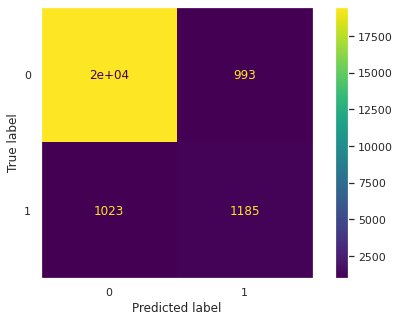

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(8,5))
plt.grid(False)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)
plt.savefig('predictions', dpi=200);

## Deep Neural Network

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics 
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

In [ ]:
oversampler = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = oversampler.fit_resample(X_train, y_train)

In [ ]:
model = Sequential()

num_cols = X_train_SMOTE.shape[1]

model.add(Dense(12, input_shape=(num_cols,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                72        
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cross_entropy_loss = keras.losses.BinaryCrossentropy()
network_optimizer = keras.optimizers.Adam(learning_rate=0.03, beta_1=0.95, beta_2=0.995, epsilon=0.00000000001)
early_stopping_condition = EarlyStopping(monitor='loss', mode='auto', patience=15, restore_best_weights=True, min_delta=0)
plateau_monitor = ReduceLROnPlateau(monitor='loss', mode='auto', patience=5, factor=0.03, min_lr=0.0000001)

model.compile(loss=cross_entropy_loss, optimizer=network_optimizer)

In [ ]:
history = model.fit(X_train_SMOTE, y_train_SMOTE, epochs=50, callbacks=[early_stopping_condition, plateau_monitor])

Train on 122870 samples
Epoch 1/10
122870/122870 [==============================] - 8s 69us/sample - loss: 0.6939 - lr: 0.0300
Epoch 2/10
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6938 - lr: 0.0300
Epoch 3/10
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6939 - lr: 0.0300
Epoch 4/10
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6937 - lr: 0.0300
Epoch 5/10
122870/122870 [==============================] - 8s 62us/sample - loss: 0.6939 - lr: 0.0300
Epoch 6/10
122870/122870 [==============================] - 7s 57us/sample - loss: 0.6939 - lr: 0.0300
Epoch 7/10
122870/122870 [==============================] - 7s 57us/sample - loss: 0.6939 - lr: 0.0300
Epoch 8/10
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6938 - lr: 0.0300
Epoch 9/10
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6938 - lr: 0.0300
Epoch 10/10
122870/122870 [======================

In [ ]:
model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


0.6910444306457965

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
y_pred

array([[0.49870124],
       [0.49870124],
       [0.49870124],
       ...,
       [0.49870124],
       [0.49870124],
       [0.49870124]], dtype=float32)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.498701    22709
dtype: int64

In [ ]:
history = model.fit(X_train_SMOTE, y_train_SMOTE, epochs=50, callbacks=[early_stopping_condition, plateau_monitor])

Train on 122870 samples
Epoch 1/50
122870/122870 [==============================] - 9s 76us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 2/50
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 3/50
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 4/50
122870/122870 [==============================] - 7s 59us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 5/50
122870/122870 [==============================] - 7s 60us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 6/50
122870/122870 [==============================] - 7s 59us/sample - loss: 0.6932 - lr: 9.0000e-04
Epoch 7/50
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6932 - lr: 2.7000e-05
Epoch 8/50
122870/122870 [==============================] - 7s 57us/sample - loss: 0.6932 - lr: 2.7000e-05
Epoch 9/50
122870/122870 [==============================] - 7s 58us/sample - loss: 0.6932 - lr: 2.7000e-05
Epoch 10/50
1